<font size="6"> AI 724 - Statistical Techniques for Spatio-Temporal Data
Analysis</center>          
<br>


<font size="5">   <center> Variograms using GSTAT models          
<br>


In this exercise we shall carryout Time series preprocessing ad time series decomposition. 
The dataset used is the Airline passenger dataset

***Load the required libraries***

# Variograms  using GSTAT model

In [1]:

import skgstat as skg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:


s = [30, 80, 300]
data1 = skg.data.pancake(N=s[0], seed=42, as_dataframe=True).get('sample')
data2 = skg.data.pancake(N=s[1], seed=42, as_dataframe=True).get('sample')
data3 = skg.data.pancake(N=s[2], seed=42, as_dataframe=True).get('sample')



In [3]:
def plot_scatter(data, ax):
    art = ax.scatter(data.x, data.y, 50, c=data.v, cmap='plasma')
    plt.colorbar(art, ax=ax)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
# import folium
# rom folium import plugins
%matplotlib inline

### Read the data 
# df=pd.read_csv("data.csv")
# df.head(3)

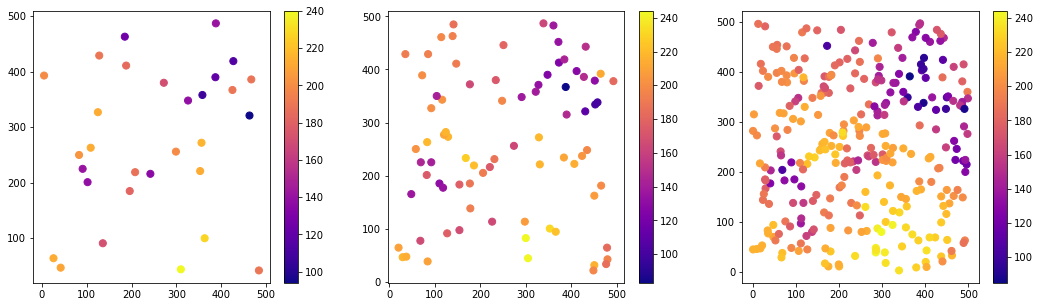

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for data, ax in zip((data1, data2, data3), axes.flatten()):
    plot_scatter(data, ax)



One of the features of scikit-gstat is the fact that it is programmed object oriented. That means, we can just instantiate a Variogram object and start changing arguments unitl it models spatial dependency in our observations well.


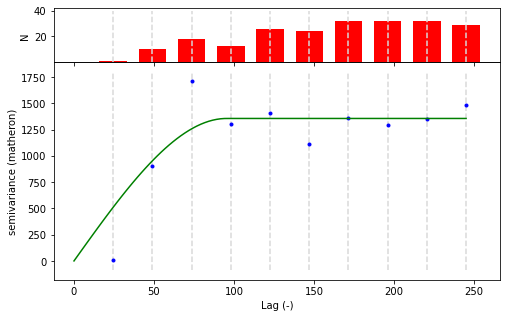

In [6]:


V1 = skg.Variogram(data1[['x', 'y']].values, data1.v.values, maxlag='median', normalize=False)
V1.plot(show=False);



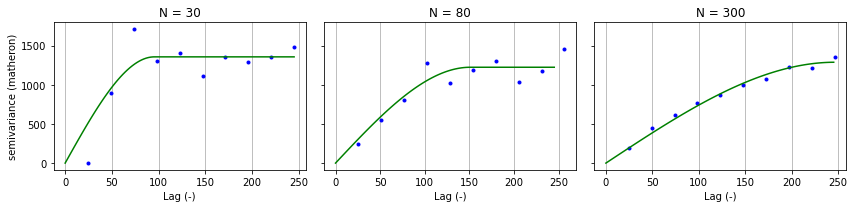

In [7]:
V2 = skg.Variogram(data2[['x', 'y']].values, data2.v.values, maxlag='median', normalize=False)
V3 = skg.Variogram(data3[['x', 'y']].values, data3.v.values, maxlag='median', normalize=False)

fig, _a = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
axes = _a.flatten()

x = np.linspace(0, V1.maxlag, 100)

# plot each variogram
for i, v in enumerate([V1, V2, V3]):
    axes[i].plot(v.bins, v.experimental, '.b')
    axes[i].plot(x, v.fitted_model(x), '-g')
    axes[i].set_title(f'N = {s[i]}')
    axes[i].set_xlabel('Lag (-)')
    if i == 0:
        axes[0].set_ylabel('semivariance (matheron)')
    axes[i].grid(which='major', axis='x')
plt.tight_layout()

We can see how the experimental variogram changes dramatically with sample size. Depending on the sample size, we can also choose different number of lag classes. As the Variogram is object oriented, we can simple update the binning function. First we set the number of lags directly, then we derive it from the distance matrix distribution. In the code below, we build the plot from scratch, demonstrating how you can access the empirical data and how it is updated, when new parameters are supplied.

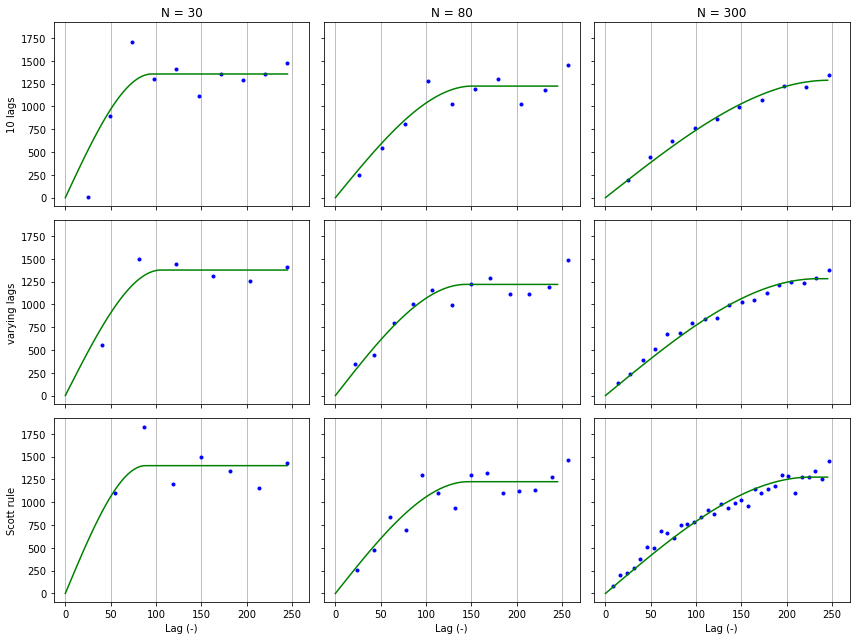

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9), sharey=True, sharex=True)

x = np.linspace(0, V1.maxlag, 100)
manual_lags = (6, 12, 18)
col_lab = ['10 lags', 'varying lags', 'Scott rule']

# plot each variogram
for i in range(3):
    for j, v in enumerate([V1, V2, V3]):
        # first row - use same settings
        if i == 0:
            v.bin_func = 'even'
            v.n_lags = 10
        # second row - use the manual lags
        if i == 1:
            v.n_lags = manual_lags[j]
        # last row - use scott
        if i == 2:
            v.bin_func = 'scott'
            axes[i][j].set_xlabel('Lag (-)')
        
        # plot
        axes[i][j].plot(v.bins, v.experimental, '.b')
        axes[i][j].plot(x, v.fitted_model(x), '-g')
        axes[i][j].grid(which='major', axis='x')
        
        # label first col
        if j == 0:
            axes[i][j].set_ylabel(col_lab[i])
        # title first row
        if i == 0:
            axes[i][j].set_title(f'N = {s[j]}')
plt.tight_layout()




That actually demonstrates how the selection of the experimental variogram can have huge influence on the base data for fitting. Now consider the center column. In each of the plots, the selection of model is not deterministic. You can argue for at least two different models here, that might actually be supported by the empirical data. The Variogram class has several goodness of fit measures to help you on assessing the fit. This does not replace a careful visual inspection of the models, but can assist you in making an decision. Remember that the Kriging will be influenced by the quality of the spatial model, especially on short distances. We can quickly cycle all available models for the sample size of 80 to see if spherical fits best. The histogram plot can be turned off.


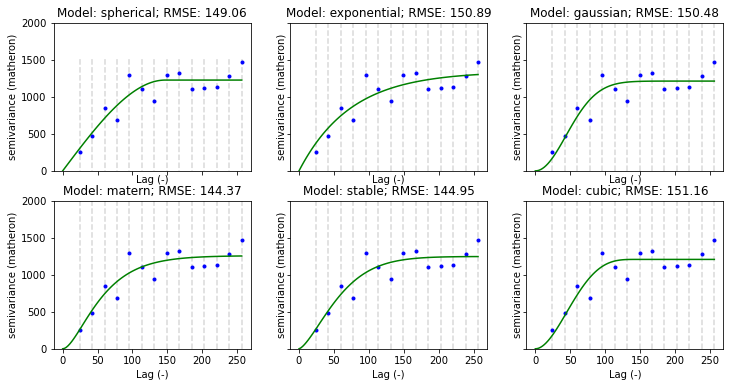

In [9]:


# we use the settings from before - scott rule
V2.bin_func = 'scott'
fig, _a = plt.subplots(2,3, figsize=(12, 6), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    V2.model = model
    V2.plot(axes=axes[i], hist=False, show=False)
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, V2.rmse))
    axes[i].set_ylim(0, 2000)



In [10]:


df = pd.read_csv('Turf.csv')
df.head()
     


,Sensor,Date,Time,Ground Temp,Salinity,Dielectric,Moisture,Latitude,Longtitude,Type
0,G1A0000333_18GFC,July 12th 2021,11:59 AM,8 °C,0.3 dS/m,9 V/m,18%,-41.138691,175.020691,NaN
1,G1A0000338_18GBL,July 12th 2021,12:02 PM,7 °C,0.5 dS/m,7 V/m,15%,-41.139042,175.020737,NaN
2,G1A0000345_ 17GBC,July 12th 2021,12:02 PM,7 °C,0.3 dS/m,7 V/m,15%,-41.135422,175.024002,NaN
3,G1A0000347_ 13GBL,July 12th 2021,12:05 PM,8 °C,0.5 dS/m,7 V/m,15%,-41.137749,175.017578,Creeping Bentgrass
4,G1A0000353_ 2GFC,July 12th 2021,12:00 PM,7 °C,0.6 dS/m,12 V/m,24%,-41.139885,175.012894,Creeping Bentgrass




This is quite important. We find all 6 models to describe the experimental variogram more or less equally well in terms of RMSE. Think of the implications: We basically can use any model we like. This is a problem as i.e. the gaussian and the spherical model describe fundamentally different spatial properties. Thus, our model selection should be driven by interpretation of the variogram, and not the difference in RMSE of only 0.4%, which might very likely not be significant at all.

But what does this difference look like, when it comes to interpolation?


In [11]:


def interpolate(V, ax):
    xx, yy = np.mgrid[0:499:100j, 0:499:100j]
    ok = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')
    field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
    art = ax.matshow(field, origin='lower', cmap='plasma', vmin=V.values.min(), vmax=V.values.max())
    ax.set_title('%s model' % V.model.__name__)
    plt.colorbar(art, ax=ax)
    return field



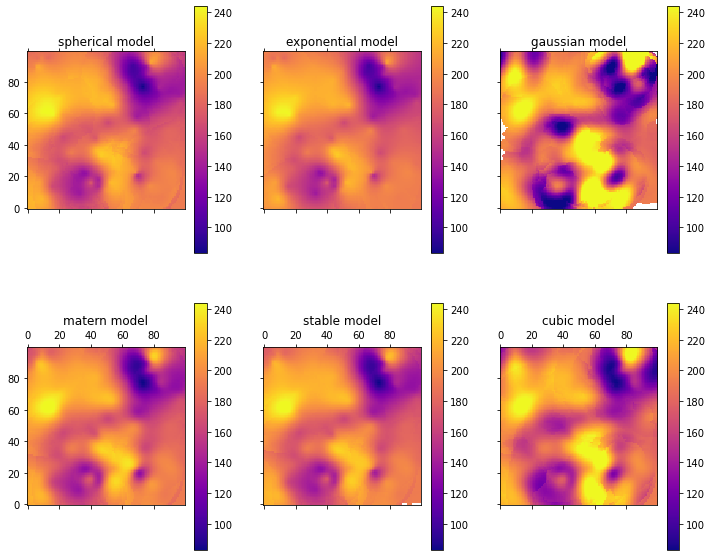

In [12]:
fields = []
fig, _a = plt.subplots(2,3, figsize=(12, 10), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    V2.model = model
    fields.append(interpolate(V2, axes[i]))


In [13]:
from pykrige.ok import OrdinaryKriging
import numpy as np

# Define data points
x = [0.0, 2.0, 1.0, 3.0]
y = [0.0, 0.0, 2.0, 1.0]
z = [10.0, 20.0, 30.0, 40.0]

# Define grid
gridx = np.arange(0.0, 3.0, 0.5)
gridy = np.arange(0.0, 2.0, 0.5)

# Perform ordinary kriging
OK = OrdinaryKriging(x, y, z, variogram_model='linear')
z_interp, sigma = OK.execute('grid', gridx, gridy)

# Print results
print(z_interp)

[[9.999999999999998 13.046984622138865 15.791352631690998
  18.148774655618773 19.999999999999996 25.592198356287675]
 [13.826895594736753 16.06272790846117 18.86942074884196
  21.752077776866585 25.23851139494591 30.098616714364965]
 [17.563933402011397 19.863611824373436 22.71120526959928
  25.878181684084108 29.67844495460107 34.455139734756926]
 [20.99220723851321 23.563940166591014 26.532669353205016
  29.466919415145604 32.763158030261806 36.49635485777304]]


In [14]:


lats=df['Latitude']
lons=df['Longtitude']

In [15]:
df['Moisture'] = [int(s.replace("%", "")) for s in df['Moisture']]

In [16]:
val = df['Moisture']

In [17]:
df.head(6)

,Sensor,Date,Time,Ground Temp,Salinity,Dielectric,Moisture,Latitude,Longtitude,Type
0,G1A0000333_18GFC,July 12th 2021,11:59 AM,8 °C,0.3 dS/m,9 V/m,18,-41.138691,175.020691,NaN
1,G1A0000338_18GBL,July 12th 2021,12:02 PM,7 °C,0.5 dS/m,7 V/m,15,-41.139042,175.020737,NaN
2,G1A0000345_ 17GBC,July 12th 2021,12:02 PM,7 °C,0.3 dS/m,7 V/m,15,-41.135422,175.024002,NaN
3,G1A0000347_ 13GBL,July 12th 2021,12:05 PM,8 °C,0.5 dS/m,7 V/m,15,-41.137749,175.017578,Creeping Bentgrass
4,G1A0000353_ 2GFC,July 12th 2021,12:00 PM,7 °C,0.6 dS/m,12 V/m,24,-41.139885,175.012894,Creeping Bentgrass
5,G1A0000354_16GBR,July 12th 2021,12:04 PM,7 °C,0.6 dS/m,8 V/m,16,-41.131798,175.023636,Creeping Bentgrass


In [18]:
# Define the grid on which to interpolate
grid_lon = np.linspace(min(lons), max(lons), 100)
grid_lat = np.linspace(min(lats), max(lats), 100)

In [19]:
OK = OrdinaryKriging(lons, lats, val, variogram_model='linear',
                     verbose=False, enable_plotting=False)

In [20]:

# Interpolate the grid
z, ss = OK.execute('grid', grid_lon, grid_lat)

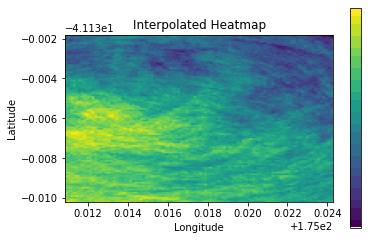

In [21]:
import matplotlib.pyplot as plt

# Create a heatmap of the interpolated values
plt.imshow(z.T, origin='lower', extent=[min(grid_lon), max(grid_lon), min(grid_lat), max(grid_lat)])
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Heatmap')
plt.show()

In the imshow function call  z.T refers to the transpose of the interpolated values z.

The reason for transposing z is that the imshow function expects the input to be in row-major order, while OrdinaryKriging.execute returns the interpolated values in column-major order. Transposing z flips the rows and columns, so that the values are in the correct order for imshow.

By specifying origin='lower' in the imshow function call, we're indicating that the (0, 0) coordinate should be located at the bottom-left corner of the plot. This is a common convention for plotting two-dimensional arrays, with the first index (i.e., the row number) corresponding to the y-axis, and the second index (i.e., the column number) corresponding to the x-axis.

In [22]:
z

masked_array(
  data=[[17.833333333333435, 17.833333333333425, 17.833333333333425, ...,
         17.833333333333353, 17.833333333333357, 17.83333333333336],
        [17.833333333333442, 17.833333333333425, 17.833333333333417, ...,
         17.833333333333353, 17.833333333333353, 17.833333333333357],
        [17.83333333333343, 17.83333333333344, 17.833333333333417, ...,
         17.83333333333335, 17.83333333333335, 17.833333333333353],
        ...,
        [17.833333333333396, 17.833333333333393, 17.833333333333382, ...,
         17.83333333333333, 17.83333333333332, 17.833333333333314],
        [17.833333333333396, 17.83333333333339, 17.833333333333393, ...,
         17.83333333333333, 17.833333333333318, 17.83333333333331],
        [17.8333333333334, 17.83333333333339, 17.83333333333339, ...,
         17.83333333333332, 17.833333333333307, 17.833333333333318]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [

In [23]:
print(z)

[[17.833333333333435 17.833333333333425 17.833333333333425 ...
  17.833333333333353 17.833333333333357 17.83333333333336]
 [17.833333333333442 17.833333333333425 17.833333333333417 ...
  17.833333333333353 17.833333333333353 17.833333333333357]
 [17.83333333333343 17.83333333333344 17.833333333333417 ...
  17.83333333333335 17.83333333333335 17.833333333333353]
 ...
 [17.833333333333396 17.833333333333393 17.833333333333382 ...
  17.83333333333333 17.83333333333332 17.833333333333314]
 [17.833333333333396 17.83333333333339 17.833333333333393 ...
  17.83333333333333 17.833333333333318 17.83333333333331]
 [17.8333333333334 17.83333333333339 17.83333333333339 ...
  17.83333333333332 17.833333333333307 17.833333333333318]]


# Universal Kriging example

In [24]:
from pykrige.uk import UniversalKriging


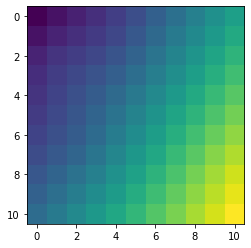

In [25]:
"""
Universal Kriging Example
=========================
In this example we apply a regional linear trend to the kriging system.
"""

import matplotlib.pyplot as plt
import numpy as np

from pykrige.uk import UniversalKriging

data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

###############################################################################
# Create the universal kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. Variogram is handled as in the ordinary kriging case.
# drift_terms is a list of the drift terms to include; currently supported terms
# are 'regional_linear', 'point_log', and 'external_Z'. Refer to
# UniversalKriging.__doc__ for more information.

UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

###############################################################################
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)

z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

# Universal Kriging example

Original data:
Longitude: [122 166  92 138  86 122 136]
Latitude:  [-46 -36 -25 -73 -25  50 -29]
z:         [2.75 3.36 2.24 3.07 3.37 5.25 2.82]

Krige at 60° latitude:
Longitude: [  0.  60. 120. 180. 240. 300. 360.]
Value:     [5.29 5.11 5.27 5.17 5.35 5.63 5.29]
Sigma²:    [2.22 1.32 0.42 1.21 2.07 2.48 2.22]

Ignoring curvature:
Value:     [4.55 4.72 5.25 4.82 4.61 4.53 4.48]
Sigma²:    [3.79 2.   0.39 1.85 3.54 5.46 7.53]


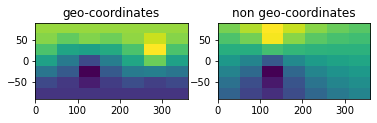

In [26]:
# -*- coding: utf-8 -*-
"""
Geometric example
=================
A small example script showing the usage of the 'geographic' coordinates type
for ordinary kriging on a sphere.
"""

import numpy as np
from matplotlib import pyplot as plt

from pykrige.ok import OrdinaryKriging

# Make this example reproducible:
np.random.seed(89239413)

# Generate random data following a uniform spatial distribution
# of nodes and a uniform distribution of values in the interval
# [2.0, 5.5]:
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0

# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lat = np.linspace(-90.0, 90.0, 7)

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

###############################################################################
# Print data at equator (last longitude index will show periodicity):

print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

###############################################################################
# We can see that the data point at longitude 122, latitude 50 correctly
# dominates the kriged results, since it is the closest node in spherical
# distance metric, as longitude differences scale with cos(latitude).
# When kriging using longitude / latitude linearly, the value for grid points
# with longitude values further away as longitude is now incorrectly
# weighted equally as latitude.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()

# Ordinary Kriging example

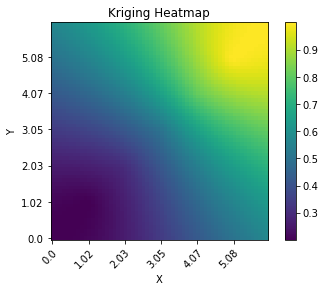

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

# Define your x, y, and z data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
z = np.array([0.2, 0.3, 0.5, 0.8, 1.0])

# Define the grid of points at which to estimate values
gridx = np.linspace(0, 6, 60)
gridy = np.linspace(0, 6, 60)

# Create the kriging object
OK = OrdinaryKriging(x, y, z, variogram_model='linear',
                     verbose=False, enable_plotting=False)

# Estimate the values at the grid points
z_interp, sigmasq = OK.execute('grid', gridx, gridy)

# Generate heatmap
fig, ax = plt.subplots()
im = ax.imshow(z_interp, cmap='viridis', origin='lower')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add title and labels
ax.set_title('Kriging Heatmap')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Define ticks and tick labels
xticks = np.arange(0, 60, 10)
yticks = np.arange(0, 60, 10)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(gridx[xticks], 2))
ax.set_yticklabels(np.round(gridy[yticks], 2))

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.show()